## Data Description
    
  - **Earliest_cr_line** :The month the borrower's earliest reported credit line was opened<br>
  - **Emp_title** :The job title supplied by the Borrower when applying for the loan.<br>
  - **Fico_range_high** :The upper boundary range the borrower’s FICO at loan origination belongs to.<br>
  - **Fico_range_low** :The lower boundary range the borrower’s FICO at loan origination belongs to.<br>
  - **Grade** :LC assigned loan grade<br>
  - **Application_type** :Indicates whether the loan is an individual application or a joint application with two co-borrowers.<br>
  - **Initial_list_status** :The initial listing status of the loan. Possible values are – W, F<br>
  - **Num_actv_bc_tl** :Number of currently active bankcard accounts.<br>
   - **Mort_acc** :Number of mortgage accounts.<br>
  - **Tot_cur_bal** :Total current balance of all accounts.<br>
  - **Open_acc** :The number of open credit lines in the borrower's credit file.<br>
  - **Pub_rec** :Number of derogatory public records.<br>
  - **pub_rec_bankruptcies** :Number of public record bankruptcies.<br>
  - **Purpose** :A category provided by the borrower for the loan request.<br>
  - **revol_bal** :Total credit revolving balance<br>
  - **Title** :The loan title provided by the borrower<br>
  - **total_acc** :The total number of credit lines currently in the borrower's credit file.<br>
  - **verification_status** :Indicates if income was verified by LC, not verified, or if the income source was verified.<br>
  - **addr_state** :The state provided by the borrower in the loan application.<br>
  - **annual_inc** :The self-reported annual income provided by the borrower during registration.<br>
  - **emp_length** :Employment length in years. Possible values are between 0 and 10 where<br>
    0 means less than one year and 10 means ten or more years.<br>
  - **home_ownership** :The home ownership status provided by the borrower during registration.<br>
    Our values are: RENT, OWN, MORTGAGE, OTHER.<br>
  - **int_rate** :Interest Rate on the loan<br>
  - **loan_amnt** :The listed amount of the loan applied for by the borrower. If at some point<br>
    in time, the credit department reduces the loan amount, then it will be reflected in this value.<br>
  - **sub_grade** :LC assigned loan subgrade.<br>
  - **Term** :The number of payments on the loan. Values are in months and can be either 36 or 60.<br>
  - **revol_util** :Revolving line utilization rate, or the amount of credit the borrower is<br>
    using relative to all available revolving credit.<br>

   - **Target<br>
    loan_status :Status of the loan.<br>**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [2]:
#changing the working directory
os.chdir("C://Users//HP//OneDrive//Desktop//Machine learning")

In [3]:
# importing the dataset
df=pd.read_csv("train_loan_data.csv")

# Data Preparation
 - Understainding the data <br>
 - Descriptive Statistics <br>
 - Missing value Treatment <br>
 - Outlier Treatment <br>
 - Exploratory Data Analysis <br>
 - Encoding <br>
 - Splitting the data into Train and Test

###  Understanding the Data

In [4]:
# first five rows of the dataset
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [5]:
#length of the dataframe
len(df)


80000

In [6]:
# shape of the dataframe
df.shape

(80000, 28)

In [7]:
# No. of columns in dataframe
df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [8]:
# Count of total no. of columns
len(df.columns)

28

In [9]:
#No. of duplicate values
df.duplicated().sum()

0

In [10]:
# counts of categories in loan_status
df.loan_status.value_counts()

Paid         64030
Defaulted    15970
Name: loan_status, dtype: int64

## Descriptive Statictics

In [11]:
# Missing values and dtypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [12]:
# Statistic analysis
df.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [13]:
# object columns
df.describe(include="O")

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
count,80000,80000,75412,74982,80000,80000,80000,80000,80000,80000,80000,79030,80000,80000
unique,51,640,11,36661,7,6,2,2,14,35,2,5348,3,2
top,CA,Sep-03,10+ years,Teacher,B,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Source Verified,Paid
freq,11744,547,26278,1278,23502,39628,78446,46745,46418,4982,60750,39396,30855,64030


## Missing Value Treatment

In [14]:
# missing values
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [15]:
# %of missing values
df.isnull().sum()/len(df)*100

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              5.73500
emp_title               6.27250
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
purpose                 0.00000
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
title                   1.21250
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64

In [16]:
# dropping missing values
df.dropna(axis=0,inplace=True)

In [17]:
# After droping the missing values
df.shape

(70375, 28)

In [18]:
# cleaned data
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


C:\Users\HP\AppData\Local\Temp\ipykernel_65964\2137880393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())#annot=True


<Axes: >

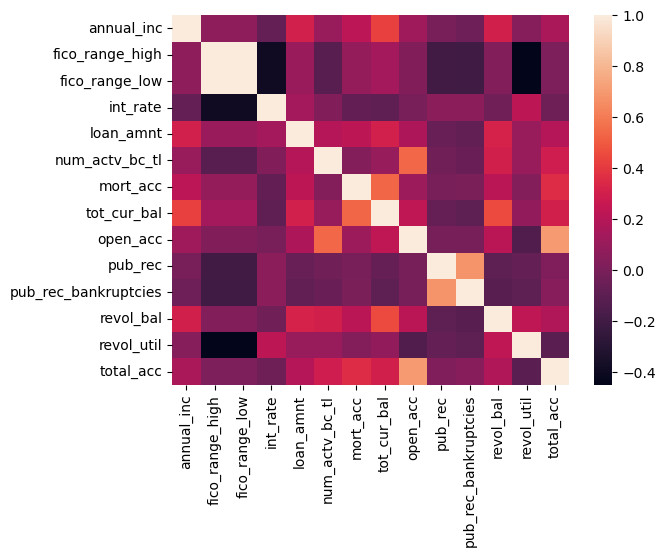

In [19]:
#heat map
sns.heatmap(df.corr())#annot=True

## Outlier Treatment

In [20]:
def outlier_treatment(dataframe):
    Q1=dataframe.quantile(0.25)
    Q3=dataframe.quantile(0.75)
    IQR=Q3-Q1

    df_rem_out=dataframe[~((dataframe<(Q1-1.5*IQR))|(dataframe>(Q3+1.5*IQR))).any(axis=1)]
    
    return df_rem_out
 
df=outlier_treatment(df)
                           

C:\Users\HP\AppData\Local\Temp\ipykernel_65964\3248823653.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=dataframe.quantile(0.25)
C:\Users\HP\AppData\Local\Temp\ipykernel_65964\3248823653.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=dataframe.quantile(0.75)
C:\Users\HP\AppData\Local\Temp\ipykernel_65964\3248823653.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_rem_out=dataframe[~((dataframe<(Q1-1.5*IQR))|(dataframe>(Q3+1.5*IQR))).any(axis=1)]


In [21]:
# after removing the outliers
df.shape

(46136, 28)

## Exploratory Data Analysis

<Figure size 1500x200 with 0 Axes>

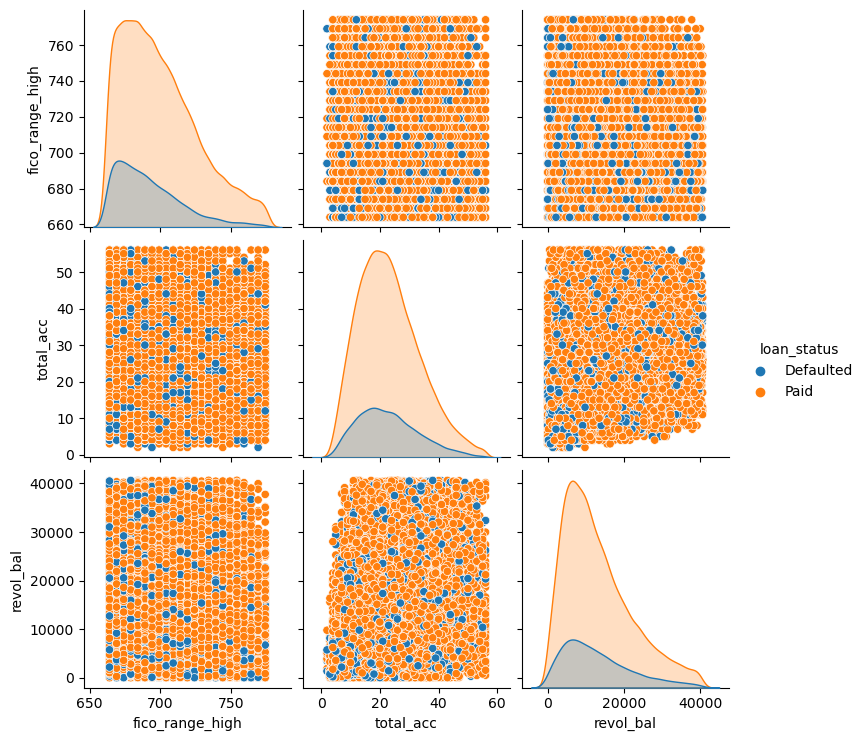

In [22]:
#pairplot
plt.figure(figsize=(15,2))
sns.pairplot(df[["fico_range_high","total_acc","revol_bal","loan_status"]],hue="loan_status")

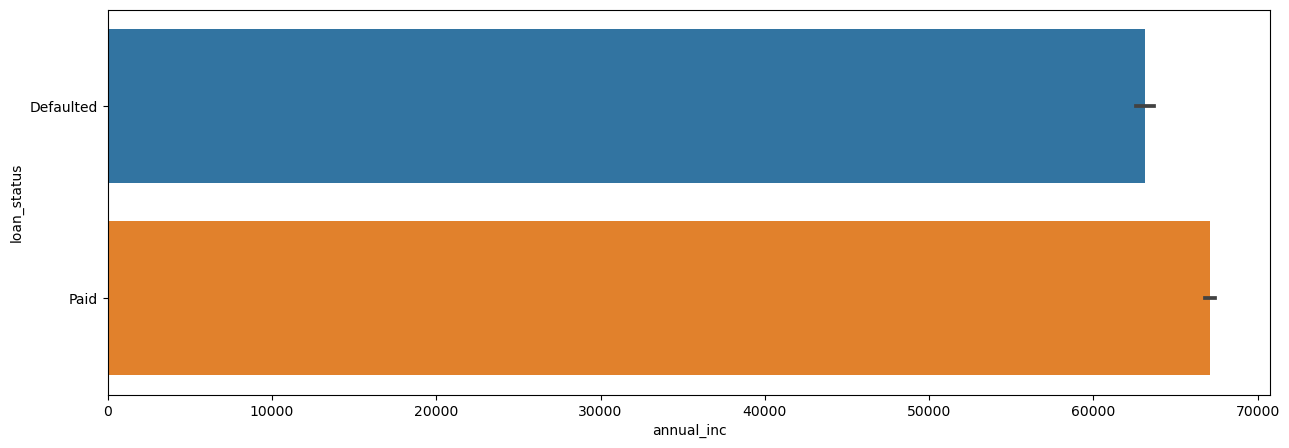

In [23]:
# people with more annual income have paid the loan
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="annual_inc",y="loan_status")
plt.show()

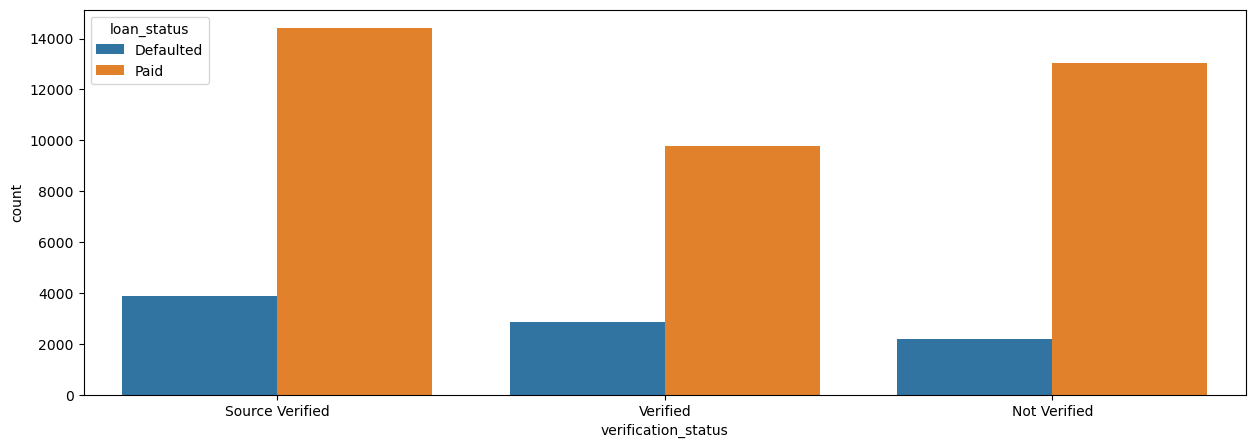

In [24]:
# count of verified people
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="verification_status",hue="loan_status")
plt.show()

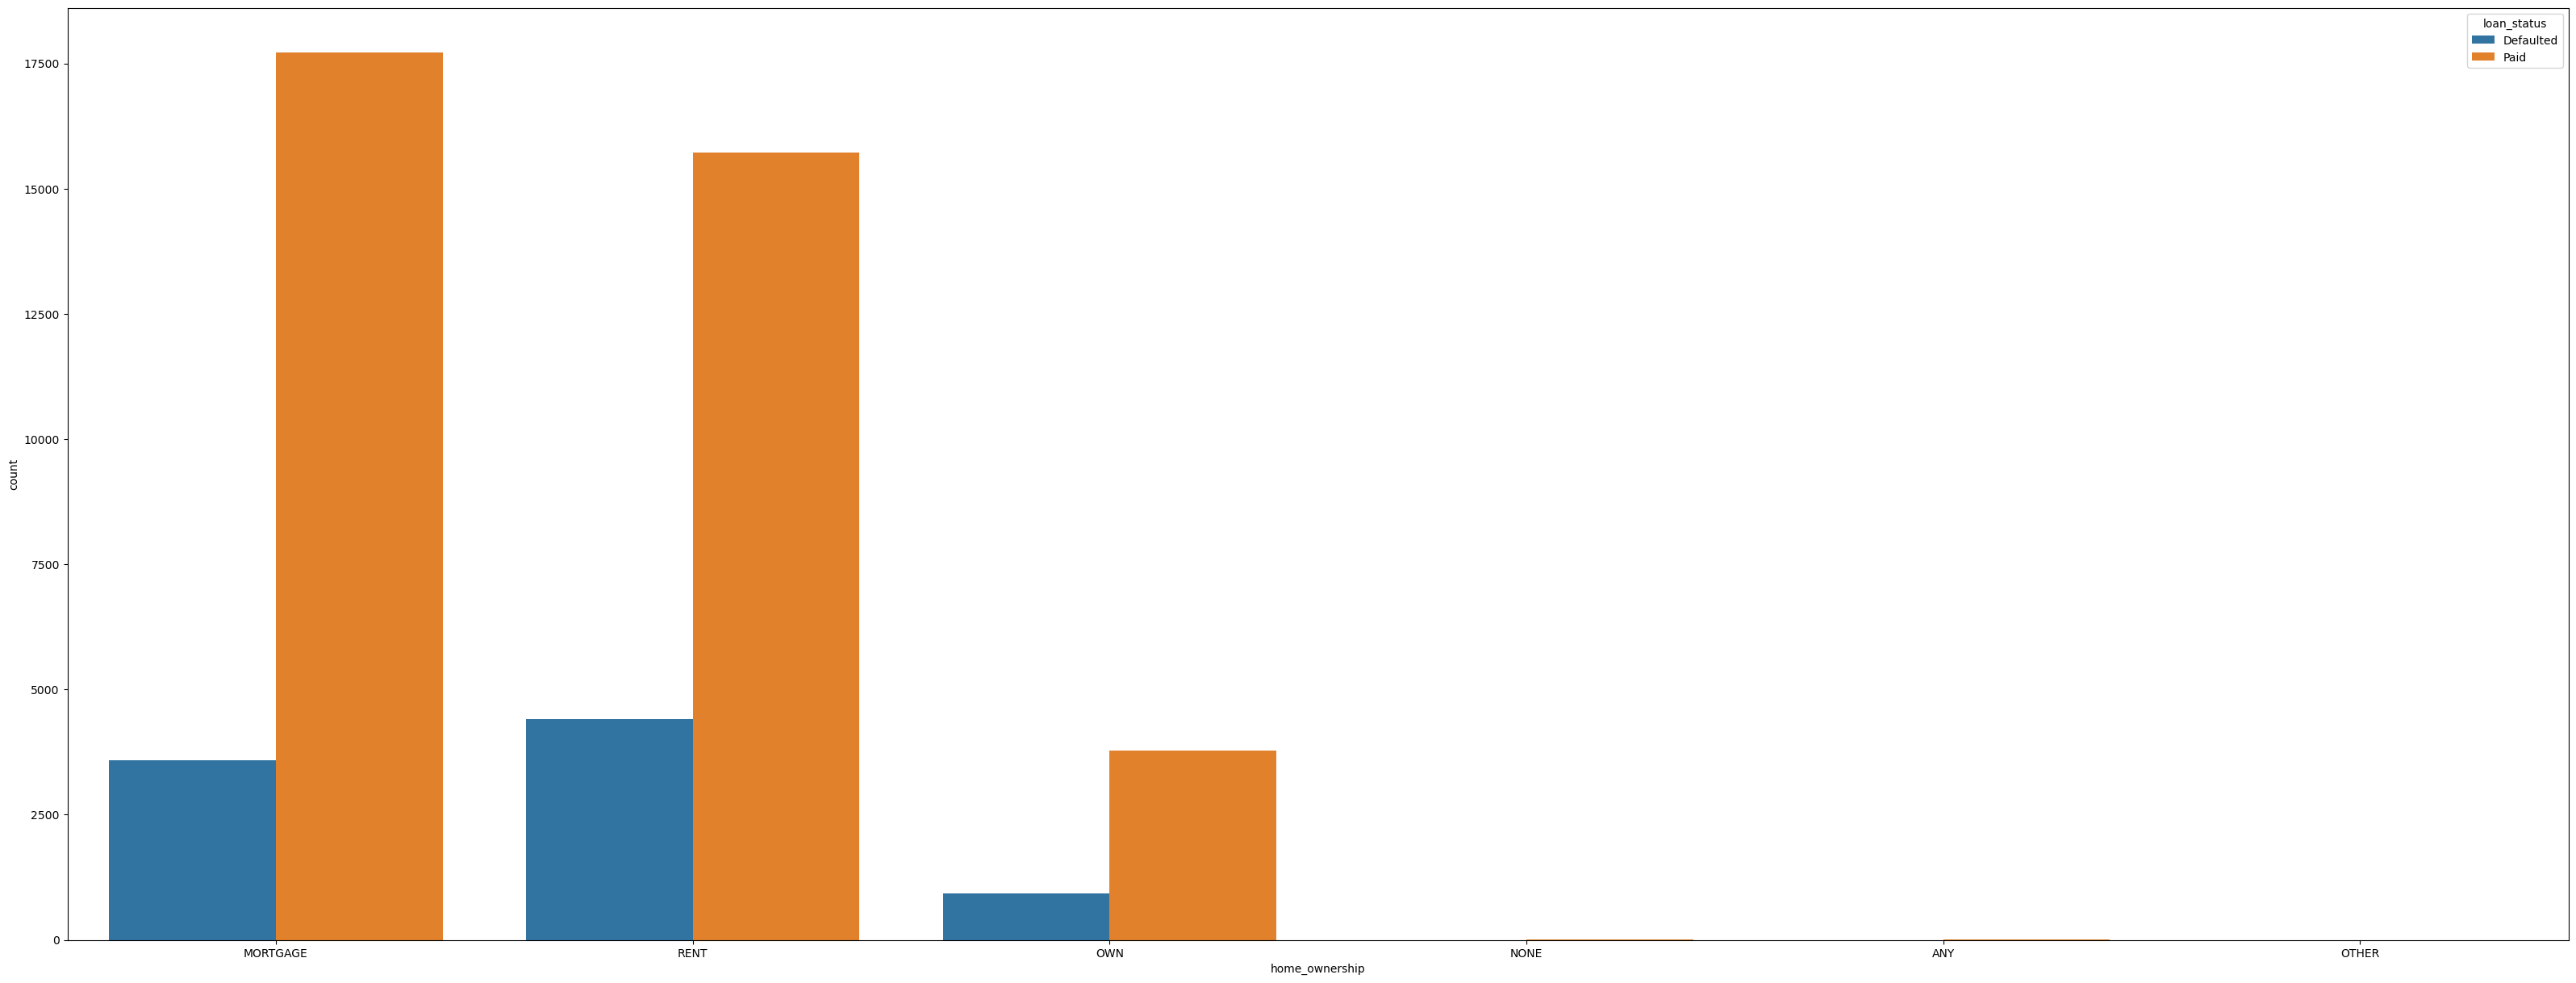

In [25]:
# count 
plt.figure(figsize=(40,15))
sns.countplot(data=df,x="home_ownership",hue="loan_status")
plt.show()

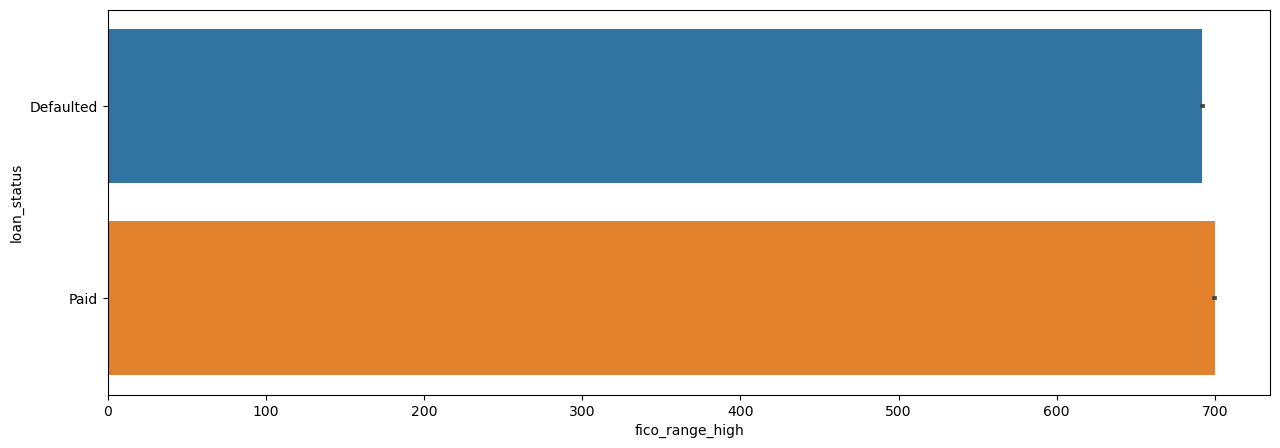

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="fico_range_high",y="loan_status")
plt.show()

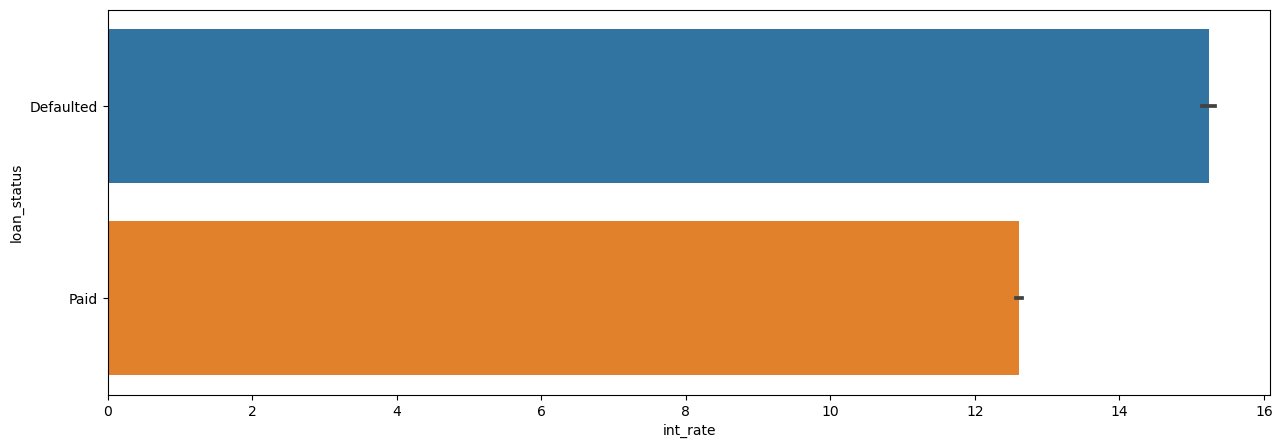

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="int_rate",y="loan_status")
plt.show()

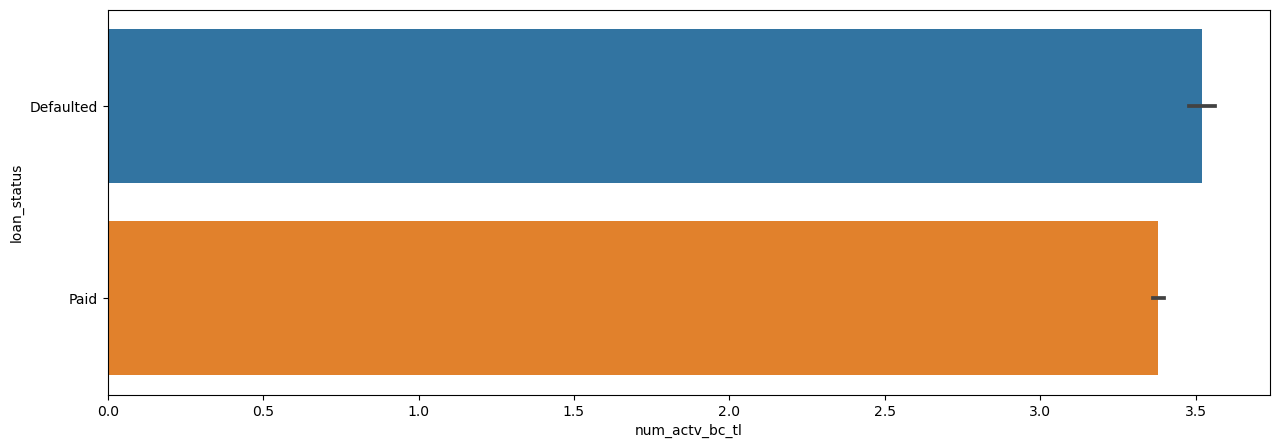

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="num_actv_bc_tl",y="loan_status")
plt.show()

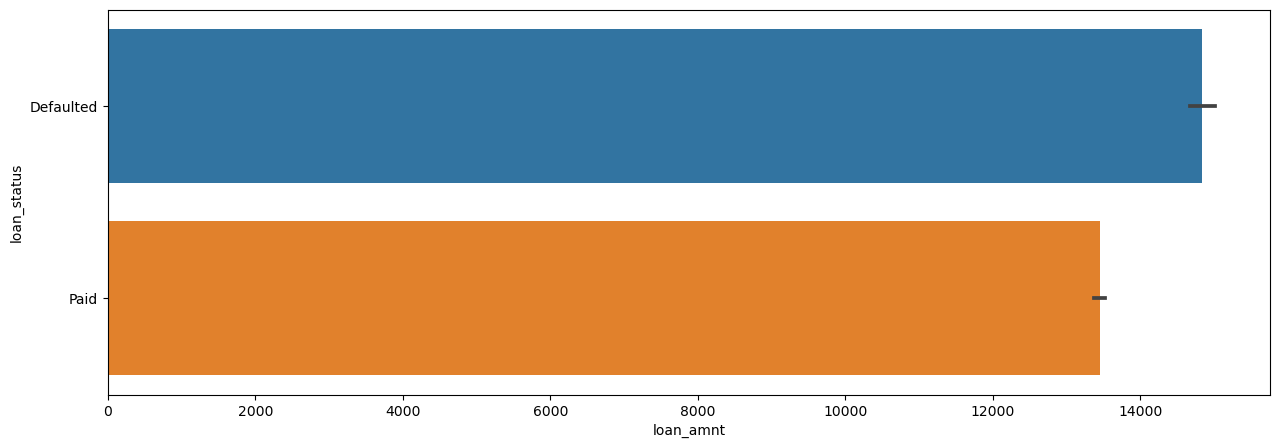

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="loan_amnt",y="loan_status")
plt.show()

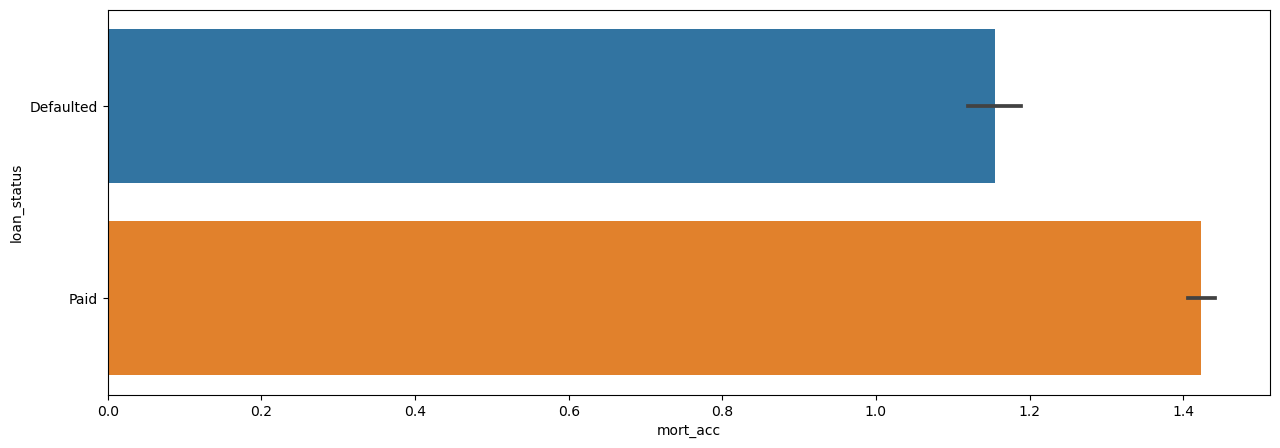

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="mort_acc",y="loan_status")
plt.show()

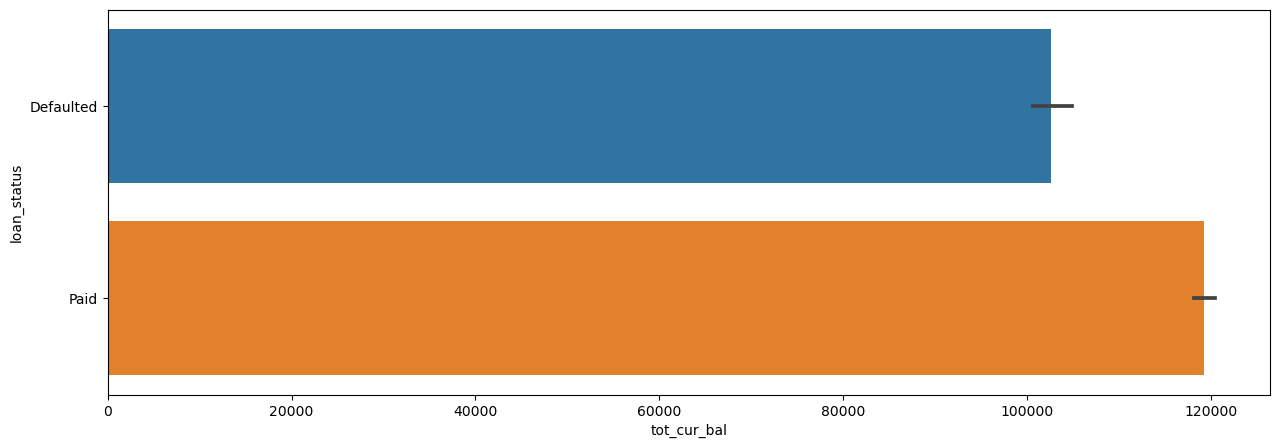

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="tot_cur_bal",y="loan_status")
plt.show()

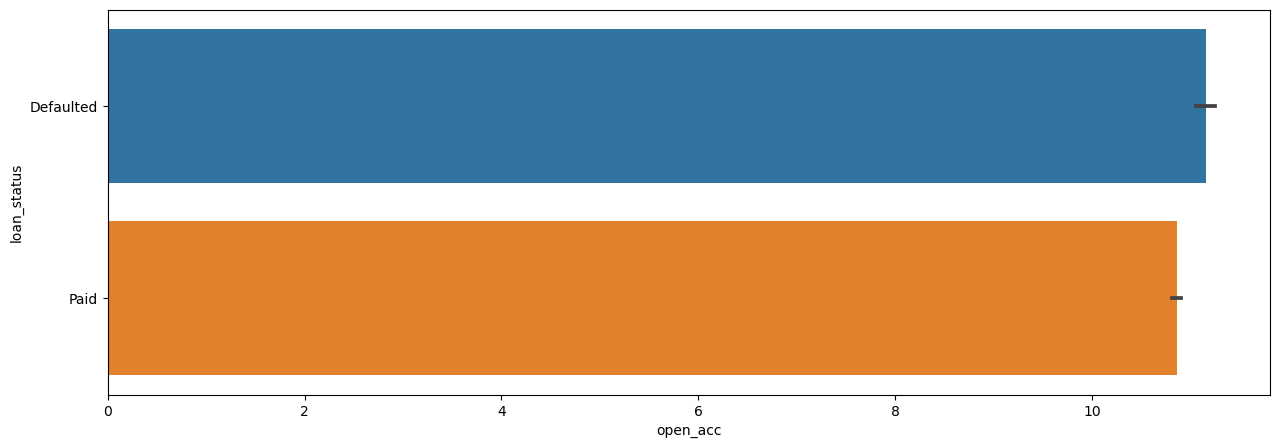

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="open_acc",y="loan_status")
plt.show()

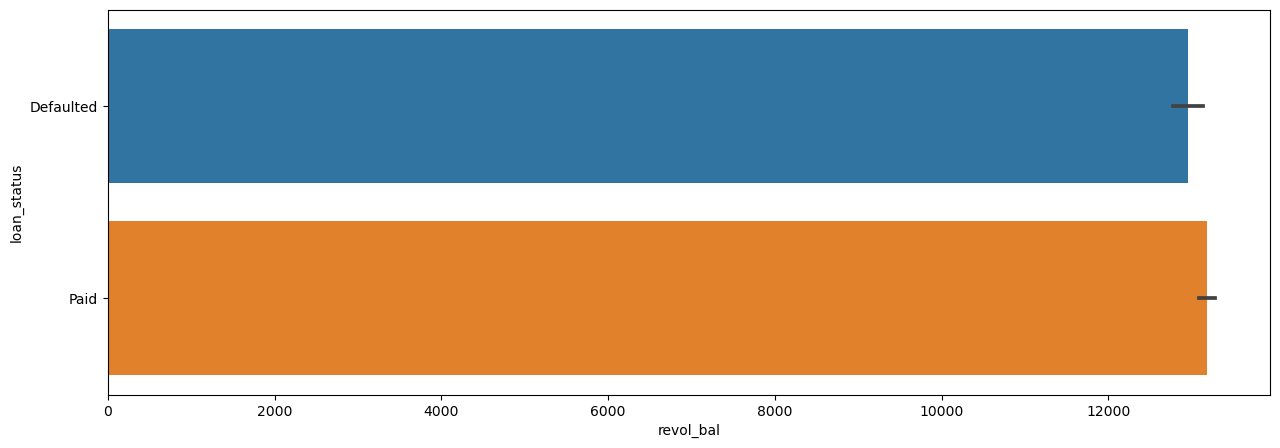

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="revol_bal",y="loan_status")
plt.show()

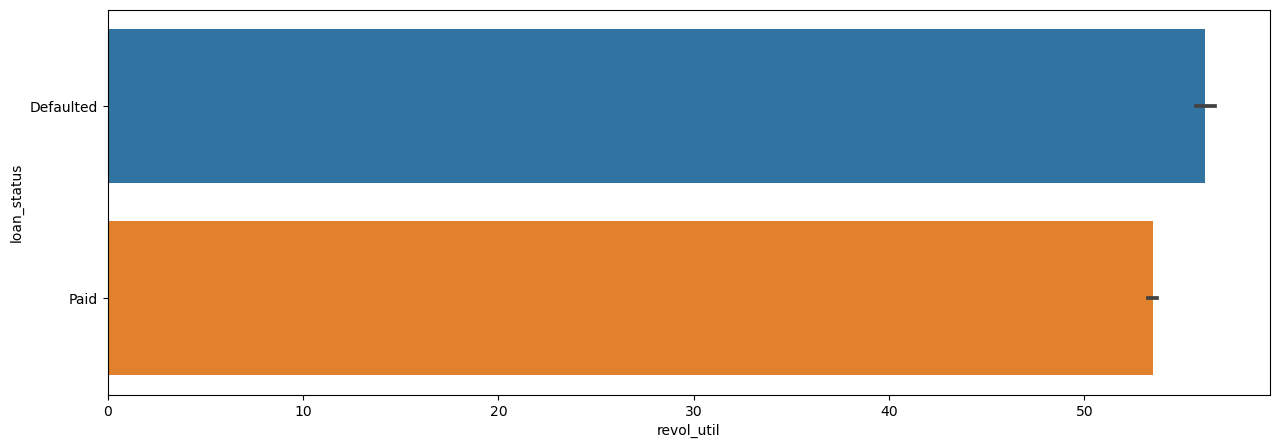

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="revol_util",y="loan_status")
plt.show()

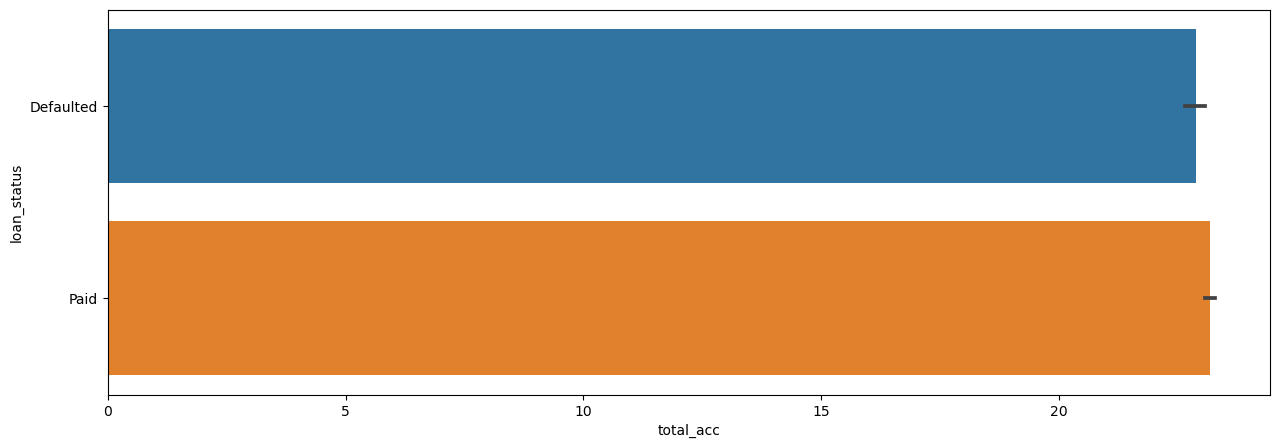

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="total_acc",y="loan_status")
plt.show()

#### Histogram for all columns

array([[<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'fico_range_high'}>,
        <Axes: title={'center': 'fico_range_low'}>,
        <Axes: title={'center': 'int_rate'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'num_actv_bc_tl'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'tot_cur_bal'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>,
        <Axes: title={'center': 'revol_bal'}>],
       [<Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x500 with 0 Axes>

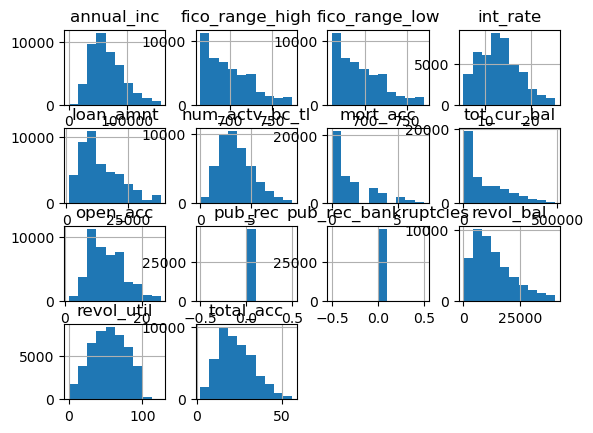

In [36]:
plt.figure(figsize=(15,5))
df.hist()

**use power transform after encoding before scaling**

## Encoding

In [37]:
# Separating the numerical and categorical columns
def data_type(df):
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(df, categorical):
    for i in categorical:
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes
    return df

df = encoding(df, categorical)

## Feature scaling


In [38]:
## feature scaling 
from sklearn.preprocessing import StandardScaler

def feature_scaling(df, numerical):
    sc_x = StandardScaler()
    df[numerical] = sc_x.fit_transform(df[numerical])
    return df

df = feature_scaling(df, numerical)

In [39]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,0.658163,289,1,5186,1.726258,1.726258,4,1,0,...,0.0,2,-0.873384,1.676733,20,1,830,-1.453561,1,0
1,4,-0.928036,34,1,5152,0.970741,0.970741,1,5,0,...,0.0,2,0.761599,0.266072,5,0,582,-1.068789,2,1
2,9,-0.223058,54,1,11048,-0.729172,-0.729172,1,1,0,...,0.0,2,1.125961,1.460686,9,0,830,-0.684017,1,1
3,13,1.213050,566,1,22717,-1.295810,-1.295810,1,1,0,...,0.0,2,0.591563,0.634623,6,0,830,-0.395439,1,1
6,33,1.186896,522,1,14567,0.026345,0.026345,2,1,0,...,0.0,1,2.165763,0.003426,10,0,626,1.239841,2,1


In [40]:
#plt.figure(figsize=(15,5))
#df.hist()


In [41]:
df=df.drop(["addr_state","fico_range_high","pub_rec_bankruptcies","pub_rec","earliest_cr_line"],axis=1)

In [42]:

len(df.columns)

23

## Splitting the data into train and test

In [43]:
#input and output variables
X=df.iloc[:,range(0,21)].values
y=df.iloc[:,22].values

In [44]:
# split the data into train and validation data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

- Logistic Regression Model<br>
- KNearest Neighbour Model<br>
- Xgboost

## Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
prediction=logistic.predict(X_test)
prediction


array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix

# confusion matrix
cm1=confusion_matrix(y_test,prediction)
cm1

array([[  59, 1751],
       [ 105, 7313]], dtype=int64)

In [49]:
# calculating the accuracy
accuracy_score=accuracy_score(y_test,prediction)
accuracy_score

0.7988729952319029

In [51]:
# ACCURACY OF Logistic Regression
from sklearn import metrics
accuracyList=[]
modelList=[]
# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test,prediction))
accuracyList.append(metrics.accuracy_score(y_test, prediction))
modelList.append("Logistic Regression")

Accuracy: 0.7988729952319029


In [52]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm1
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.8068181818181818
recall 0.9858452413049339


## KNearest Neighbour Model

In [53]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_ini = KNeighborsClassifier()
knnmodel_ini.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
#Running the model on the test dataset
y_pred_ini = knnmodel_ini.predict(X_test)
y_pred_ini

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [55]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve, accuracy_score, log_loss

In [56]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.7726484612050282

In [57]:
#Using confusion matrix we are checking the accuracy on the testing dataset

cm1=confusion_matrix(y_test,y_pred_ini)
cm1

array([[ 131, 1679],
       [ 419, 6999]], dtype=int64)

In [58]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm1
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.8065222401474994
recall 0.9435157724454031


In [59]:
# ACCURACY OF KNN
from sklearn import metrics

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ini))
accuracyList.append(metrics.accuracy_score(y_test, y_pred_ini))
modelList.append("KNN")

Accuracy: 0.7726484612050282


In [60]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report

print(classification_report(y_test,knnmodel_ini.predict(X_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.24      0.07      0.11      1810
 Positive(1)       0.81      0.94      0.87      7418

    accuracy                           0.77      9228
   macro avg       0.52      0.51      0.49      9228
weighted avg       0.70      0.77      0.72      9228



In [61]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,knnmodel_ini.predict(X_test))

8.194580061808386

### Comparing the test and train data Accuracies


In [62]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = knnmodel_ini.predict(X_train)

In [63]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

0.8310935298580253

In [64]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.7726484612050282

**Conclusion:** As there is very less difference between the accuracy of training and testing dataset we are good to go with the model

### (Tunning) Finding the best value for K

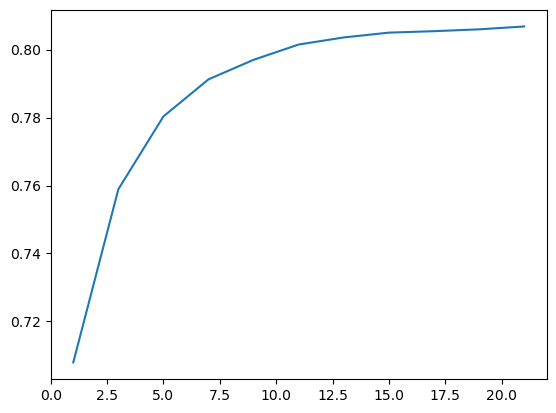

In [65]:
#Using K-fold cross validation technique we will find the best value of K
k_value = [1,3,5,7,9,11,13,15,17,19,21]
from sklearn.model_selection import cross_val_score
cv_score = []

for k in k_value:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knnmodel, X_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())
    
cv_score
plt.plot(k_value, cv_score)
plt.show()
#The best value of K is coming out to be 11, we will retrain the model with the value of K as 11

In [66]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_tuned = KNeighborsClassifier(n_neighbors=11)
knnmodel_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [67]:
#Running the model on the test dataset
y_pred_tuned = knnmodel_tuned.predict(X_test)

In [68]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.798114434330299

## Xgboost

In [69]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
import xgboost as xgb

In [71]:
 xgb_cal=xgb.XGBClassifier( n_estimators = 10)
xgb_cal

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
# Fit  from the model
xgb_cal.fit(X_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
#predict the model
preds = xgb_cal.predict(X_test)
preds

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
# ACCURACY OF Xgboost
from sklearn import metrics
# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("XGBoost")

Accuracy: 0.8036410923276983


In [75]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm = confusion_matrix(y_test, preds)
cm

array([[  46, 1764],
       [  48, 7370]], dtype=int64)

In [76]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.8068754105539742
recall 0.9935292531679698


## Conclusion

In [77]:
# We create a final list to collate all the results so far
finalList= [modelList, accuracyList, precisionList, recallList]
# final dataframe to see all the results.
pd.DataFrame(finalList, index=['Model', 'Accuracy', 'Precision', 'Recall']).T

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.798873,0.806818,0.985845
1,KNN,0.772648,0.806522,0.943516
2,XGBoost,0.803641,0.806875,0.993529


# *From here we conclude that all models gives almost same Accuracy, Recall and Precision but **xgboost** gives the highest accuracy*